In [1]:
import numpy as np 
import FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import FCPlate
from FlowCytometryTools import ThresholdGate, PolyGate
import matplotlib.pyplot as plt
import scipy as sp
import scipy.special
import seaborn as sns
import pandas as pd
import datetime as dt

df = pd.read_csv('/Users/kristenlok/Downloads/tc_data.csv')
df['corrected total count']=df['total count']*df['lambda']/(1-np.exp(-df['lambda']))
df.head(50)

/Users/kristenlok/opt/anaconda3/lib/python3.8/site-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)
/Users/kristenlok/opt/anaconda3/lib/python3.8/site-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)


,Unnamed: 0,group,time point,time,well,S freq,lambda,total count,yfp mean,bfp mean,dilution,corrected total count
0,0,1,0,0.000000,A1,0.028223,2.013966,21093,7638.835938,8828.968750,0.05,49023.124536
1,1,1,0,0.000000,A2,0.028223,2.013966,21093,7638.835938,8828.968750,0.05,49023.124536
2,2,1,0,0.000000,A3,0.028223,2.013966,21093,7638.835938,8828.968750,0.05,49023.124536
3,3,1,0,0.000000,A4,0.028223,2.013966,21093,7638.835938,8828.968750,0.05,49023.124536
4,4,1,0,0.000000,A5,0.028223,2.013966,21093,7638.835938,8828.968750,0.05,49023.124536
5,5,1,0,0.000000,A6,0.028223,2.013966,21093,7638.835938,8828.968750,0.05,49023.124536
6,6,2,0,0.000000,A7,0.947771,1.514433,24433,7535.210938,8429.955078,0.05,47434.565599
7,7,2,0,0.000000,A8,0.947771,1.514433,24433,7535.210938,8429.955078,0.05,47434.565599
8,8,2,0,0.000000,A9,0.947771,1.514433,24433,7535.210938,8429.955078,0.05,47434.565599
9,9,2,0,0.000000,A10,0.947771,1.514433,24433,7535.210938,8429.955078,0.05,47434.565599


In [2]:
def get_freqncount(df, times, group): 
    freq_dict = {}
    count_dict = {}
    freq_list = []
    count_list = []
    for time in times:
        df_day = df.loc[df['time point'] == time]
        freq_rep = []
        count_rep = []
        for i in range(len(df_day)):
            if df_day.iloc[i,1] == group:
                freq = df_day.iloc[i,5] #S_freq index = 5
                freq_rep.append(freq)
                count = df_day.iloc[i,11] #corrected total count index = 11
                count_rep.append(count)
        freq_list.append(freq_rep)
        count_list.append(count_rep)
    freq_dict["Group " + str(group)] = freq_list
    count_dict["Group " + str(group)] = count_list
    return freq_dict, count_dict

In [3]:
times = list(range(1,8))
groups = list(range(1,5))

all_freqs = []
all_counts = []
for group in groups:
    freq, count = get_freqncount(df, times, group)
    all_freqs.append(freq)
    all_counts.append(count)
    
print(all_freqs)
print(all_counts)

[{'Group 1': [[0.03602357276805132, 0.0295294145706874, 0.02808292999280582, 0.032288642703799456, 0.02882346951064458, 0.03503381411719585], [0.07146469758233683, 0.06958572679495376, 0.06507403396633017, 0.06607173193792905, 0.06399660042787833, 0.07788239398289762], [0.0461650409522218, 0.04480245347697547, 0.047024479679793695, 0.04367797149860033, 0.04411905068022644, 0.05364582133334992], [0.0431146390405891, 0.0589814814046908, 0.045779780100719744, 0.046109274909235685, 0.04272059513059359, 0.05930956718542235], [0.03315204079217825, 0.02639120855848157, 0.028028750725740882, 0.029548780803761176, 0.02845276805210013, 0.024320483185901444], [0.031017510846373268, 0.02238667342908177, 0.027157905507203383, 0.025929282024870843, 0.02945276889997713, 0.021873324469241198], [0.04662530470461365, 0.034199512187603, 0.04302212464032935, 0.04232922246049215, 0.050902847254706604, 0.03247443018781163]]}, {'Group 2': [[0.9523629939634676, 0.93756251900983, 0.9528922269144132, 0.95072580

In [86]:
def vst(df, time, group):
    df_day = df.loc[df['time point'] == time]
    vst_dict = {}
    all_vst = []
    for i in range(len(df_day)):
        if df_day.iloc[i,1] == group:
            corr_count = df_day.iloc[i,11]
            bfp = df_day.iloc[i,9]
            yfp = df_day.iloc[i,8]
            bfp_freq = bfp/(bfp+yfp)
            f_trafo = np.sqrt(corr_count)*np.arcsin(2*bfp_freq - 1)
            all_vst.append(f_trafo)
    vst_dict["Group " + str(group)] = all_vst
    return vst_dict

def vst_var(all_vsts):
    group_list = []
    vst_list = []
    var_list = []
    time_list = []
    sample_var_list = []
    for day in list(range(0,7)):
        for dictionary in all_vsts[day]:
            time_list.append(day+1)
            group = list(dictionary.keys())[0][-1]
            group_list.append(group)
            vsts = list(dictionary.values())[0]
            vst_list.append(vsts)
            vst_var = np.var(vsts)
            var_list.append(vst_var)
            vst_sample_var = np.var(vsts, ddof=1)
            sample_var_list.append(vst_sample_var)
    return group_list, vst_list, var_list, time_list, sample_var_list

In [87]:
all_vsts = []
for time in times:
    day_vst = []
    for group in groups:
        vst_d = vst(df, time, group)
        day_vst.append(vst_d)
    all_vsts.append(day_vst)
print(all_vsts)

[[{'Group 1': [2.426427640800429, 2.7070534201876266, 2.2468920959546077, 2.6268219112647015, 2.557897634127779, 2.3404482855387085]}, {'Group 2': [2.2211724083002298, 2.2564807726127083, 2.3643004545627067, 2.3498233745117534, 2.378494108616095, 2.405029166607645]}, {'Group 3': [2.0615956731588434, 1.9584759880734315, 1.9275919419498988, 1.9692050577550646, 2.120084880457853, 2.0283386061894735]}, {'Group 4': [2.385383198240786, 2.2609539942307224, 2.384534983437697, 2.3520705469584993, 2.386482568737919, 2.3493297856443536]}], [{'Group 1': [2.403922452955349, 1.8880275735758791, 2.583204385881183, 2.18464472865069, 2.4013892126419676, 1.6898332998805272]}, {'Group 2': [2.3744005500214453, 2.4806013497064052, 2.606062097524888, 2.716091328980132, 2.705344241107519, 2.917412929320431]}, {'Group 3': [2.936352679421361, 3.1392589761469356, 2.9862023925299948, 2.988745363762874, 3.651257149170004, 2.7787718954704337]}, {'Group 4': [4.055257892635206, 3.6940567758412373, 4.322121966550099,

In [88]:
title_dict = {"1":"1: L in maj,S in min",
              "2":"2: S in maj,L in min",
              "3":"3: Sl in maj,S in min",
              "4":"4: S in maj,Sl in min"}

titles = []
group_list, vst_list, var_list, time_list, sample_var_list = vst_var(all_vsts)
for group in group_list:
    titles.append(title_dict[group])
    
df_vstvar = pd.DataFrame({'time': time_list, 'group': titles, 'f_{trafo} replicates': vst_list, 'var(f_{trafo})': var_list, 'sample var(f_{trafo})': sample_var_list})
df_vstvar.head(50)


,time,group,f_{trafo} replicates,var(f_{trafo}),sample var(f_{trafo})
0,1,"1: L in maj,S in min","[2.426427640800429, 2.7070534201876266, 2.2468...",0.025959,0.031151
1,1,"2: S in maj,L in min","[2.2211724083002298, 2.2564807726127083, 2.364...",0.004466,0.005359
2,1,"3: Sl in maj,S in min","[2.0615956731588434, 1.9584759880734315, 1.927...",0.004370,0.005244
3,1,"4: S in maj,Sl in min","[2.385383198240786, 2.2609539942307224, 2.3845...",0.001942,0.002330
4,2,"1: L in maj,S in min","[2.403922452955349, 1.8880275735758791, 2.5832...",0.097737,0.117284
5,2,"2: S in maj,L in min","[2.3744005500214453, 2.4806013497064052, 2.606...",0.030642,0.036771
6,2,"3: Sl in maj,S in min","[2.936352679421361, 3.1392589761469356, 2.9862...",0.076391,0.091669
7,2,"4: S in maj,Sl in min","[4.055257892635206, 3.6940567758412373, 4.3221...",0.063683,0.076419
8,3,"1: L in maj,S in min","[4.444133312601276, 3.5544153861153505, 4.8177...",0.303631,0.364357
9,3,"2: S in maj,L in min","[4.6147871975334676, 4.223070213009133, 4.8071...",0.039114,0.046937


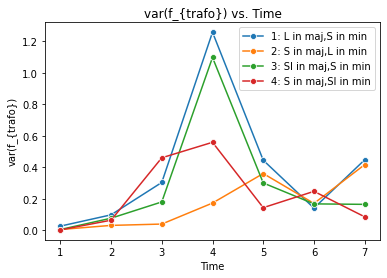

In [89]:
labels = ["1", "2", "3", "4"]  
times = list(range(1,8))
title_dict = {"1":"1: L in maj,S in min",
              "2":"2: S in maj,L in min",
              "3":"3: Sl in maj,S in min",
              "4":"4: S in maj,Sl in min"}
for group in labels:
    group_var = []
    lower_ci = []
    upper_ci = []
    for i in range(len(df_vstvar)):
        if df_vstvar.iloc[i,1][0] == group:
            group_var.append(df_vstvar.iloc[i,3])
    plot = sns.lineplot(x = times, y = group_var, label = title_dict[group], marker = 'o')
plot.set(xlabel = "Time", ylabel = "var(f_{trafo})", title = "var(f_{trafo}) vs. Time")
plot.legend()


In [95]:
def plotwCI(df_vstvar, group, CI, title_dict):
    if CI == 95: #95% CI for n=6
        a = 0.831 #chi-squared_0.975,5
        b = 12.833 #chi-squared_0.025,5
    if CI == 68: #68% CI for n=6
        a = 1.994 #chi-squared_0.84,5 (value found from 0.85 on table)
        b = 8.12 #chi-squared_0.16,5 (value found from 0.15 on table)
    group_svar = []
    group_var = []
    lower_ci = []
    upper_ci = []
    for i in range(len(df_vstvar)):
        if df_vstvar.iloc[i,1][0] == group:
            group_var.append(df_vstvar.iloc[i,3])
            group_svar.append(df_vstvar.iloc[i,4])
    for var, svar in zip(group_var, group_svar):
        lower_ci.append(var - (5*svar)/b)
        upper_ci.append((5*svar)/a - var)
    plt.figure()
    plot = sns.lineplot(x = times, y = group_var, label = title_dict[group])
    plot.errorbar(times, group_var, yerr=(lower_ci, upper_ci), fmt='o', ecolor='blue', capsize=5)
    plot.set(xlabel = "Time", ylabel = "var(f_{trafo})", title = "var(f_{trafo}) vs. Time with %s%% CI" % CI)

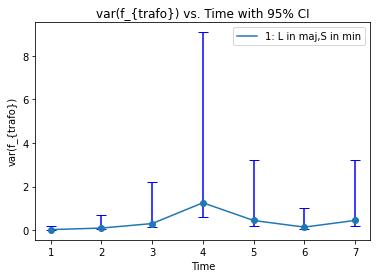

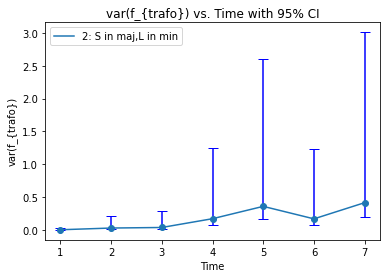

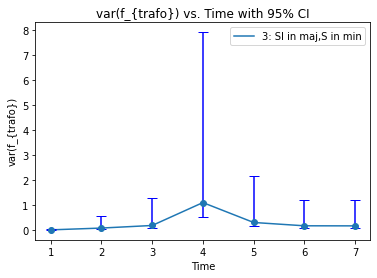

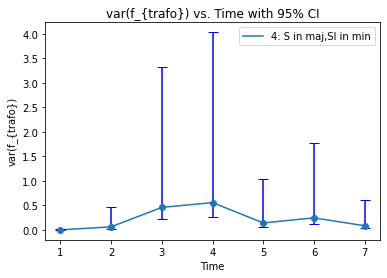

In [96]:
for label in labels:
    plotwCI(df_vstvar, label, 95, title_dict)

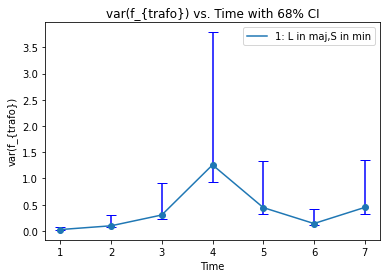

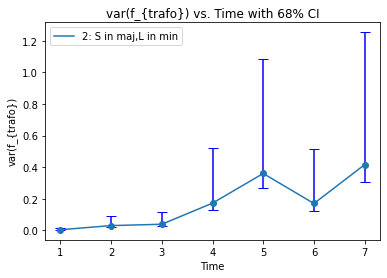

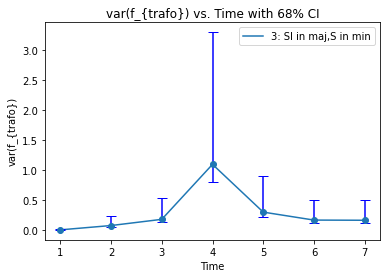

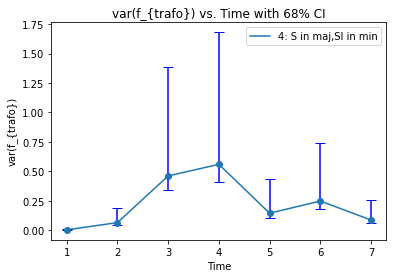

In [97]:
for label in labels:
    plotwCI(df_vstvar, label, 68, title_dict)